# Opis merytoryczny zbioru danych


Zbiór danych zawiera informacje dotyczące ubezpieczeń zdrowotnych. , zawiera informacje o 1338 osobach ubezpieczonych. Każda osoba reprezentowana jest przez jeden wiersz w zbiorze, a każdy wiersz zawiera 7 kolumn, które przedstawiają różne atrybuty: wiek, płeć, BMI, liczbę dzieci, status palenia, region oraz roczne opłaty za ubezpieczenie zdrowotne.

**Wiek(Age)**: Jest to wiek poszczególnych jednostek w zbiorze, dla których jest wyliczana składka ubezpieczenia. 

**Płeć(Sex)**: Zmienna nominalna określająca płeć ubezpieczonej osoby.

**BMI (Wskaźnik Masy Ciała)**: Jest to jeden z najpopularniejszych wskaźników pomagajacych oszacować ryzyko występowania chorób zwiazanych z nadwagą. Wskaźnik jest oszacowywany przez porówanie wzrostu z masą ciała. Oblicza sę go za pomocą wzoru BMI= masa ciałą(kg)/wzrost(m), wskaźnik jest podzielony na przedziały, którym ma odpowiadać konkretny stan zdrowia zwiazany z wagą. Wskaźnik jest stosowany tylko dla osób, które ukończyły 20 rok życia. Wg WHO konkretny stan zdrowia możemy wyczytać z przedziałów w poniższej tabeli

| BMI |
|------------|
| <16,0 – wygłodzenie;|
| 16,0-16,9 – wychudzenie |
| 17,0-18,4 – niedowaga |
| 18,5-24,9 – waga prawidłowa|
| 25,0-29,9 – nadwaga;|
| 30,0-34,9 – I stopień otyłości; |
| 35,0-39,9 – II stopień otyłości |
| >40,0 – III stopień otyłości |

**Dzieci (Children)**:Zmienna reprezentująca liczbę dzieci ubezpieczonej osoby objętych polisą. Ta zmienna może być używana do oceny wpływu obciążeń rodzinnych na koszty ubezpieczenia.

**Palacz (Smoker)**: Zmienna nominalna wskazująca, czy osoba ubezpieczona pali tytoń. Status palenia jest często silnym predyktorem w modelowaniu ryzyka zdrowotnego i związanych z tym kosztów ubezpieczeniowych.

**Region**: Zmienna kategoryczna, określająca geograficzny obszar zamieszkania ubezpieczonej osoby. Region może być używany do identyfikacji wzorców regionalnych w kosztach opieki zdrowotnej i ryzyku zdrowotnym.

**Opłaty (Charges)**: Zmienna zależna, reprezentująca roczne opłaty za ubezpieczenie zdrowotne, poszczególnych jednostek w zbiorze. 

# Statystyki opisowe



Wykoniując wszystkie poniższsze komendy w tej sekcji otrzymujemy statystyki opisowe dotyczące bazy danych, a w tej sekcji znajduje się ich opis. 
Liczba obserwacji w całym zbiorze wynosi **(N = 1338)**


W bazie danych znajdują się jednostki w wieku od 18 do 64 lat. Średni wiek badanych wynosi 39,21 roku, a w każdym kwartylu znajduje się porównywalna różnica wieku między najstarszą a najmłodszą osobą i wynosi dla q1 min 11 lat, a max 13 lat dla q4, co oznacza, że rozkład wieku jest równomierny.

Rozkłąd płci jest niemal równy, z niewielką przewagą mężczyzn (676) nad kobietami (662).

Analizując wskaźnik BMI, średnia wartość wynosi 30,66, co wskazuje, że średnia jednostka w zbiorze danych jest osobą z nadwagą w badanej populacji, ponieważ opierając się o wytyczne WHO, wartość powyżej 30 jest definiowana jako I stopień otyłości. Rozstęp wartości BMI (od 15,96 do 53,13) oznacza, że w zbiorze znajdują się osoby zarówno, które są definiowane jako wygłodzone, jak i osoby będące w III stopniu otyłości.

Średnia liczba dzieci na badanego wynosi 1,09, z maksymalną liczbą pięciorga dzieci.

Jeżeli chodzi o palaczy, to w zbiorze znajduje się 1064 osoby niepalące oraz 274 osoby palące.

W kontekście regionów, w bazie danych znajdują się osoby z 4 regionów: najwięcej osób (364) pochodzi z regionu southeast, 325 pochodzi z regionu southwest, tyle samo osób pochodzi z northwest i 324 osoby pochodzą z regionu northeast.

Na koniec, analizując opłaty ubezpieczeniowe, średnia kwota wynosi 13 270,42 USD. Rozkład tych opłat jest szeroki, od 1121,87 USD do 63770,43 USD, co może odzwierciedlać różnice w indywidualnych potrzebach ubezpieczeniowych, stanach zdrowia, polisach ubezpieczeniowych oraz innych czynnikach demograficznych i behawioralnych, co sprawdzimy w dalszej części analizy zbioru danych.

Wszystkie te podstawowe informacje posłużą nam do głębszego zrozumienia problemu i rozważenia go w dalszej części tej pracy.


In [1]:
!pip install matplotlib seaborn

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
#Informacje o typie zmiennej w zbiorze danych 
insurance = pd.read_csv('insurance.csv')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Zmienne opisowe, dla zmiennych numerycznych oraz zmiennych nominalnych w jednej tabeli. 

In [96]:
#Zmienne opisowe dla bazy
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [97]:
#Rozkład częstości płeć
insurance['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [98]:
#Rozkład częstości palaczy
insurance['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [99]:
#Rozkład częstości region
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# Wykres rozkładu i korelacji zmiennych 



W tej sekcji znajdą się opisy dotyczące rozkładu oraz korelacji pomiędzy zmiennymi znajdującymi się w zbiorze danych. Możemy tutaj zauważyć 3 najistotniejsze problemy:

1) Najwyższy poziom korelacji można zauważyć pomiędzy zmienną "opłaty ubezpieczeniowe" (charges) a osobami palącymi (smokers), gdzie współczynnik korelacji wynosi 0,79. Korelacja ta jest istotna statystycznie po przeprowadzeniu testu istotności, a p-wartość wynosi: 8.27e-283. Korelacja wskazuje na zdecydowany wpływ palenia na wysokość opłat ubezpieczeniowych, z paleniem będącym czynnikiem znacząco zwiększającym opłaty w stosunku do osób niepalących.

2) Z wiekiem zwykle rosną opłaty ubezpieczeniowe, ponieważ starsze osoby mają tendencję do większych potrzeb zdrowotnych. Potwierdzają to wyniki oraz współczynnik korelacji wynoszący 0,299 oraz istotność statystyczna, która osiąga p-wartość: 4.89e-29. Jest to umiarkowana korelacja, ale również istotna statystycznie. Potwierdza to, że wraz z wiekiem rosną opłaty ubezpieczeniowe, co może odzwierciedlać wyższe ryzyko zdrowotne związane ze starzeniem się.

3) Wyższy wskaźnik BMI może być związany z większym ryzykiem problemów zdrowotnych i w konsekwencji wyższymi opłatami ubezpieczeniowymi. Współczynnik korelacji wynosi 0,198, a p-wartość: 2.46e-13. Ta korelacja jest najsłabsza spośród tych trzech wymienionych, ale nadal istotna statystycznie. Oznacza to, że faktycznie wyższe wartości BMI mogą być związane z nieco wyższymi opłatami ubezpieczeniowymi, co może odzwierciedlać zwiększone ryzyko zdrowotne związane z nadwagą lub otyłością.


Zmienne zależne/niezależne 
W każdym z tych przypadków zmienna "opłaty ubezpieczeniowe" (charges) jest traktowana jako zmienna zależna, ponieważ jej wartość może być wpływana przez inne czynniki, takie jak status palenia, wiek czy BMI, które są w tych przypadkach zmiennymi niezależnymi.


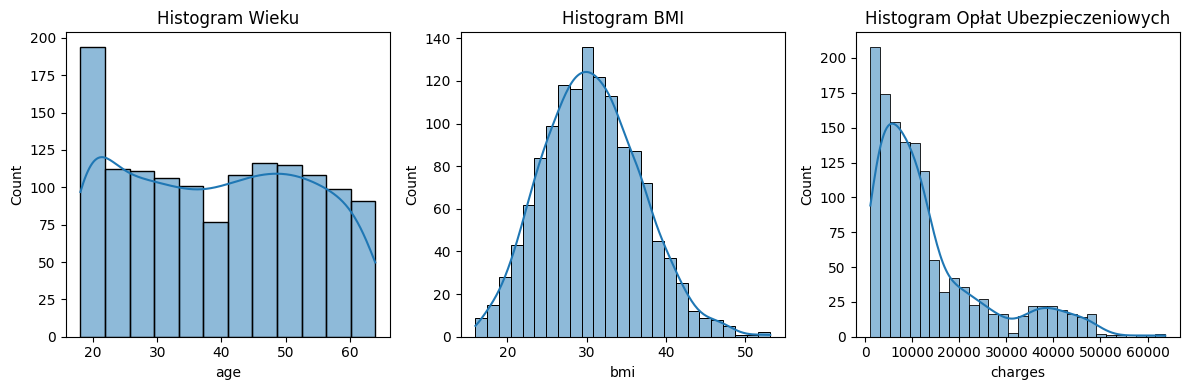

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Formatowanie wielkości wykresu
plt.figure(figsize=(12, 4))

# Histogram dla wieku
plt.subplot(1, 3, 1)
sns.histplot(insurance_data['age'], kde=True)
plt.title('Histogram Wieku')

# Histogram dla BMI
plt.subplot(1, 3, 2)
sns.histplot(insurance_data['bmi'], kde=True)
plt.title('Histogram BMI')

# Histogram dla Opłat
plt.subplot(1, 3, 3)
sns.histplot(insurance_data['charges'], kde=True)
plt.title('Histogram Opłat Ubezpieczeniowych')

#Wyświetlanie wykresu 
plt.tight_layout()
plt.show()


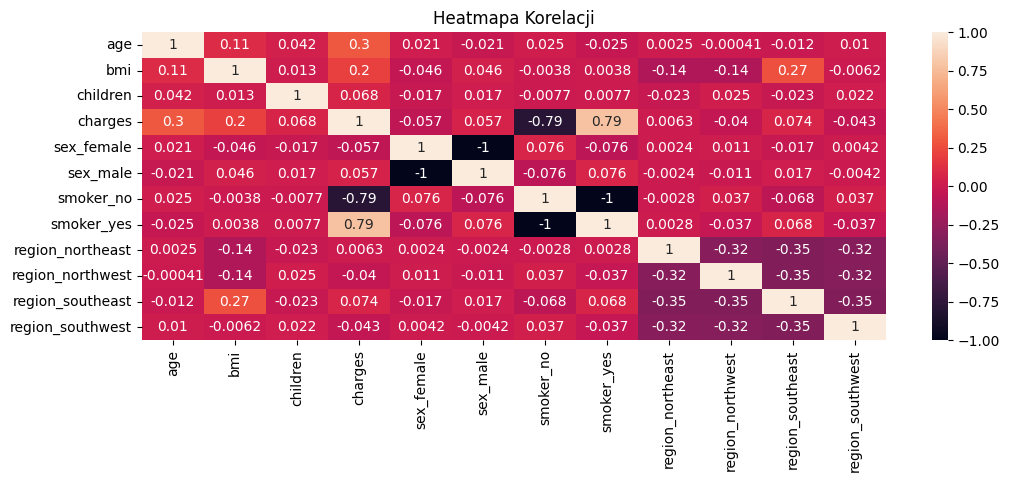

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Przekształcenie zmiennych kategorycznych na numeryczne
insurance_numeric = pd.get_dummies(insurance_data)

# Obliczenie macierzy korelacji
correlation_matrix = insurance_numeric.corr()

# Tworzenie heatmapy korelacji
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmapa Korelacji')
plt.show()

In [10]:
import pandas as pd
from scipy.stats import pearsonr

# Wczytanie danych
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Przekształcenie zmiennych kategorycznych na numeryczne
insurance_numeric = pd.get_dummies(insurance_data)

# Lista kolumn w przekształconym zbiorze danych
columns = insurance_numeric.columns

# Obliczanie istotnychs tatystycznie korelacji i p-wartości dla każdej pary zmiennych
significant_correlations = {}
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        corr, p_value = pearsonr(insurance_numeric[columns[i]], insurance_numeric[columns[j]])
        if p_value < 0.05:  # Sprawdzanie, czy korelacja jest istotna statystycznie, z założeniem dla p-value 0,05
            significant_correlations[f"{columns[i]} - {columns[j]}"] = (corr, p_value)

# Wyświetlenie istotnych korelacji
for pair, stats in significant_correlations.items():
    print(f"Korelacja między {pair}: współczynnik korelacji = {stats[0]}, p-wartość = {stats[1]}")

Korelacja między age - bmi: współczynnik korelacji = 0.10927188154853516, p-wartość = 6.194289065049163e-05
Korelacja między age - charges: współczynnik korelacji = 0.29900819333064743, p-wartość = 4.886693331718505e-29
Korelacja między bmi - charges: współczynnik korelacji = 0.19834096883362876, p-wartość = 2.459085535116766e-13
Korelacja między bmi - region_northeast: współczynnik korelacji = -0.13815622393592172, p-wartość = 3.911906898315533e-07
Korelacja między bmi - region_northwest: współczynnik korelacji = -0.13599552371133086, p-wartość = 5.941730745520304e-07
Korelacja między bmi - region_southeast: współczynnik korelacji = 0.2700246490284671, p-wartość = 8.707820869265184e-24
Korelacja między children - charges: współczynnik korelacji = 0.06799822684790466, p-wartość = 0.012852128520136508
Korelacja między charges - sex_female: współczynnik korelacji = -0.057292062202025304, p-wartość = 0.03613272100593012
Korelacja między charges - sex_male: współczynnik korelacji = 0.05729

# Wykres rozkładu zmiennej zależnej


Rozkład zmiennej "charges" w zbiorze danych ubezpieczeniowych jest kluczowy do zrozumienia, jak różne czynniki osobiste i zdrowotne wpływają na koszty ubezpieczenia. Jest to zmienna zależna, co oznacza, że jest wynikiem różnych innych czynników, takich jak wiek, BMI, płeć, status palenia czy region zamieszkania, które są zmiennymi niezależnymi, czyli tymi wpływającymi na zmienną zależną, w efekcie na opłaty za ubezpieczenie zdrowotne.

Na wykresie rozkładu dla "charges" widać, że większość opłat ubezpieczeniowych koncentruje się w niższym zakresie cen, ale istnieje również znaczna liczba przypadków z bardzo wysokimi opłatami.
Średnia wartość opłat ubezpieczeniowych w zbiorze wynosi 13,270.42 USD. Jest to wartość, która może być zawyżona przez stosunkowo niewielką liczbę bardzo wysokich opłat. Mediana opłat wynosi 9,382.03 USD, co odzwierciedla ile płaci środkowa osoba za ubezpieczenie, sugeruje to też, że średnia może być zawyżona przez grupę jednostek o ponadprzeciętnej składce zdrowotnej.

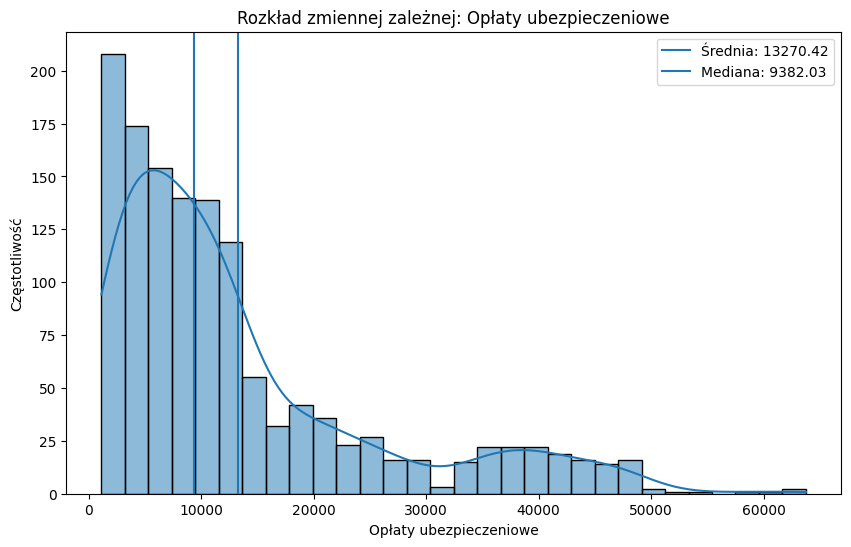

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Wczytanie danych
file_path = 'insurance.csv' 
insurance_data = pd.read_csv(file_path)

# Obliczenie średniej i mediany dla 'charges'
mean_charges = insurance_data['charges'].mean()
median_charges = insurance_data['charges'].median()

# Tworzenie wykresu i nazywanie zmiennych na wykresie / dodan
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data['charges'], kde=True)
plt.axvline(mean_charges, label=f'Średnia: {mean_charges:.2f}')
plt.axvline(median_charges, label=f'Mediana: {median_charges:.2f}')
plt.title('Rozkład zmiennej zależnej: Opłaty ubezpieczeniowe')
plt.xlabel('Opłaty ubezpieczeniowe')
plt.ylabel('Częstotliwość')
plt.legend()
plt.show()

# Model zbudowane za pomocą: Sklearn (statsmodel w dalszej części) + predykcje wykres + miary MAE, RMSE


Interpretacja wyników sklearn

Najwyższy współczynnik R^2 udało się osiągnąć dla test size w okolicach wartości 0.1, MSE: 34985337.128658235, R2: 0.8195, MAE: 4266.345, przy wzięciu pod uwagę zmiennych BMI, Wiek (Age), osoby palące (smokers_yes). Jednak ze względu na to, że wartość test size 0.1 może być niewystarczająca i doprowadzić do błędnych wniosków, postanowiłem zwiększyć wartość size do 0.2, co finalnie sprawia, że wskaźniki wyglądają w następujący sposób: MAE: 3960.8666, RMSE: 5717.8000, R2: 0.7945.
 

| Coefficient | Wartość|
|-|-|
| age| 257.040666|
| bmi| 321.839977|
| sex_male| 23625.234488|


**Wiek (age)**: Współczynnik około 257.04 wskazuje, że z każdym dodatkowym rokiem wieku opłaty ubezpieczeniowe wzrastają średnio o 257.04 dolarów.

**BMI**: Współczynnik około 321.84 wskazuje, że wyższe BMI jest związane ze wzrostem opłat ubezpieczeniowych, każdy dodatkowy punkt BMI to średnio 321.84 dolarów więcej opłat.

**Palenie (smoker_yes)**: Wysoki współczynnik 23625.23 wskazuje, że palacze płacą znacznie wyższe opłaty ubezpieczeniowe. Tak wysoki wskaźnik zmusił mnie do sprawdzenia, czy faktycznie nie jest to zbyt wysoki błąd w modelu, dlatego przeprowadźmy dodatkową analizę średnich dla osób palących i niepalących. Gdzie różnica pomiędzy takimi osobami wynosi 23615, co oznacza, że różnica pomiędzy tym wynikiem a naszym modelem jest stosunkowo niewielka.



In [103]:
!pip install scikit-learn

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Wczytanie danych
file_path = 'insurance.csv' 
insurance_data = pd.read_csv(file_path)

# Przygotowanie danych: przekształcenie zmiennych kategorycznych na numeryczne
insurance_numeric_sklearn = pd.get_dummies(insurance_data, drop_first=True)

# Wybór zmiennej zależnej i niezależnych, gdzie y jest zmienną zależną, natomiast x są zmiennymi niezależnymi z wykluczeniem 'charges' 
X = insurance_numeric_sklearn[['age', 'bmi', 'smoker_yes']]
y = insurance_numeric_sklearn ['charges']

# Podział na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Budowa modelu regresji liniowej za pomocą sklearn
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predykcje na zestawie testowym
y_pred_sklearn = lm.predict(X_test)

# Współczynniki modelu
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
age,257.040666
bmi,321.839977
smoker_yes,23625.234488


Predykcje + wykres

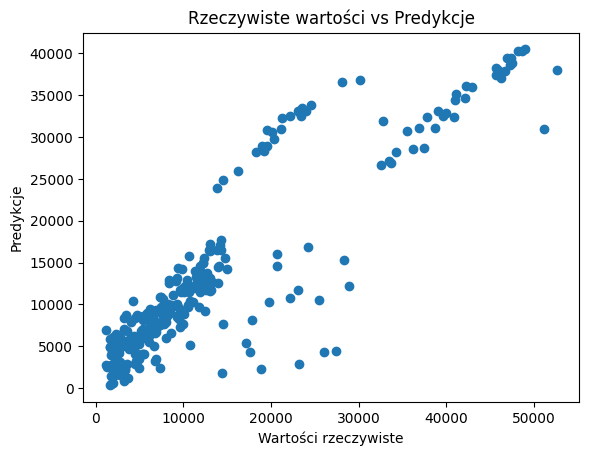

In [105]:
import matplotlib.pyplot as plt

# Predykcje na zestawie testowym
y_pred_sklearn = lm.predict(X_test)

# Wykres predykcji / nazwanie osi i wykresu 
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Predykcje')
plt.title('Rzeczywiste wartości vs Predykcje')
plt.show()

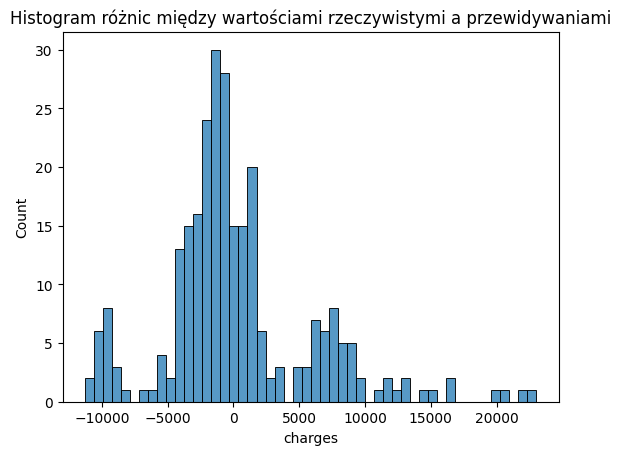

In [106]:
import seaborn as sns

# Histogram różnic między wartościami rzeczywistymi a przewidywaniami
sns.histplot((y_test - y_pred_sklearn), bins=50)
plt.title('Histogram różnic między wartościami rzeczywistymi a przewidywaniami')
plt.show()

Miary MAE, RMSE R^2



In [107]:
from sklearn import metrics
import numpy as np

# Obliczanie MAE
mae_sklearn = metrics.mean_absolute_error(y_test, y_pred_sklearn)

# Obliczanie Root Mean Squared Error (RMSE)
rmse_sklearn = np.sqrt(mse_sklearn)

# Obliczanie R2 
r2_sklearn = metrics.r2_score(y_test, y_pred_sklearn)

# Teraz możesz obliczyć RMSE i wyświetlić wyniki
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_sklearn))
print('RMSE:', np.sqrt(mse_sklearn))
print('R2:', r2_sklearn)

MAE: 3960.8666198087158
RMSE: 5717.80009607945
R2: 0.7945500805653087


Obliczenie średnich dla osób palących dodatkowe wyliczenie do sprawdzenai modelu.

In [108]:
import pandas as pd

# Wczytanie danych
file_path = 'insurance.csv'  # Zmień na odpowiednią ścieżkę do pliku
insurance = pd.read_csv(file_path)

# Obliczenie średniej wartości ubezpieczenia dla palaczy
average_cost_smokers = insurance[insurance['smoker'] == 'yes']['charges'].mean()

# Obliczenie średniej wartości ubezpieczenia dla niepalaczy
average_cost_non_smokers = insurance[insurance['smoker'] == 'no']['charges'].mean()

difference=average_cost_smokers - average_cost_non_smokers
print('Średnia wartość ubezpieczenia dla palaczy:', average_cost_smokers)
print('Średnia wartość ubezpieczenia dla niepalaczy:', average_cost_non_smokers)
print('Średnia różnica ubezpieczneia pomiedzy osobami palącymi a palącymi:', difference)

Średnia wartość ubezpieczenia dla palaczy: 32050.23183153284
Średnia wartość ubezpieczenia dla niepalaczy: 8434.268297856204
Średnia różnica ubezpieczneia pomiedzy osobami palącymi a palącymi: 23615.963533676637


# Model zbudowane za pomocą: Statsmodel + predykcje wykres + miary MAE, RMSE


Dla modelu Statsmodel udało się osiągnąć współczynnik R^2 = 0.7468892467644492, który stosunkowo dobrze przewiduje opłaty ubezpieczeniowe.

**Wiek (Age)** Współczynnik 260.97 wskazuje, że z każdym dodatkowym rokiem życia opłaty ubezpieczeniowe wzrastają średnio o około 261 dolarów.

**bmi** : spółczynnik 329.62 wskazuje, że z każdym dodatkowym punktem BMI opłaty ubezpieczeniowe wzrastają średnio o około 330 dolarów.

**smoker_yes** : Współczynnik 23450 wskazuje, że palacze płacą znacznie wyższe opłaty ubezpieczeniowe w porównaniu z niepalącymi. Średnia różnica pomiędzy palącymi a niepalącymi wynosi 23615, dlatego model ma niewielką różnicę w stosunku do wyliczonej średniej.

In [109]:
!pip install statsmodels

In [110]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Wczytanie danych
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Przygotowanie danych: przekształcenie zmiennych kategorycznych na numeryczne
insurance_data_statsmodels = pd.get_dummies(insurance_data, drop_first=True)

# Konwersja kolumn typu bool na int
bool_columns = insurance_data_statsmodels.select_dtypes(include=['bool']).columns
insurance_data_statsmodels[bool_columns] = insurance_data_statsmodels[bool_columns].astype(int)

# Wybór zmiennej zależnej i niezależnych
X_statsmodels = insurance_data_statsmodels[['age', 'bmi', 'smoker_yes']]
y_statsmodels = insurance_data_statsmodels['charges']

# Dodanie stałej do zbioru niezależnych
X_statsmodels = sm.add_constant(X_statsmodels)

# Podział na zestaw treningowy i testowy
np.random.seed(0)
mask = np.random.rand(len(X_statsmodels)) < 0.8
X_train_statsmodels = X_statsmodels[mask]
X_test_statsmodels = X_statsmodels[~mask]
y_train_statsmodels = y_statsmodels[mask]
y_test_statsmodels = y_statsmodels[~mask]

# Budowa modelu regresji liniowej za pomocą statsmodels
model_statsmodels = sm.OLS(y_train_statsmodels, X_train_statsmodels).fit()

# Predykcje na zestawie testowym
y_pred_statsmodels = model_statsmodels.predict(X_test_statsmodels)

# Wyświetlenie wyników
print(model_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1034.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.16e-313
Time:                        00:17:22   Log-Likelihood:                -10668.
No. Observations:                1055   AIC:                         2.134e+04
Df Residuals:                    1051   BIC:                         2.136e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.197e+04   1050.913    -11.386      0.0

Predykcje + wykres

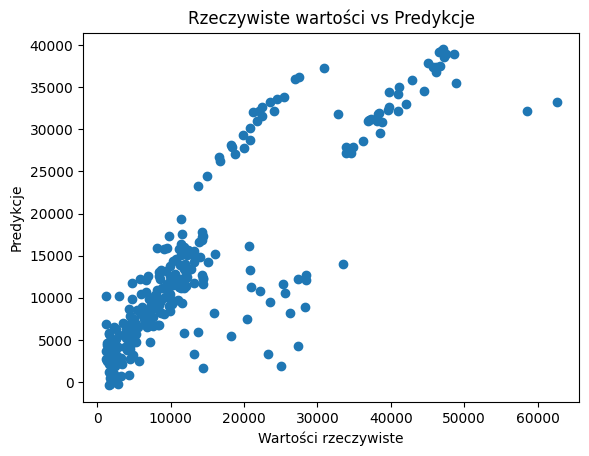

In [111]:
# Wykres predykcji vs przeczywiste wartości 
plt.scatter(y_test_statsmodels, y_pred_statsmodels)
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Predykcje')
plt.title('Rzeczywiste wartości vs Predykcje')
plt.show()

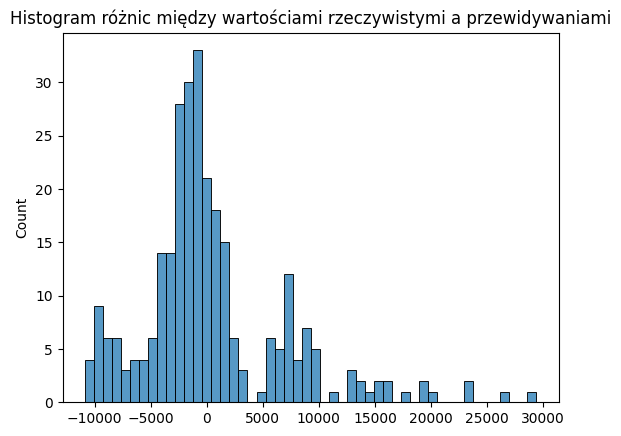

In [112]:
import seaborn as sns

# Histogram różnic między wartościami rzeczywistymi, a przewidywaniami
sns.histplot((y_test_statsmodels - y_pred_statsmodels), bins=50)
plt.title('Histogram różnic między wartościami rzeczywistymi a przewidywaniami')
plt.show()

Miary MAE, RMSE R^2


In [91]:
import numpy as np

# Obliczenie MAE
mae = np.mean(np.abs(y_test_statsmodels - y_pred_statsmodels))

# Obliczenie MSE
mse = np.mean((y_test_statsmodels - y_pred_statsmodels) ** 2)

# Obliczenie RMSE
rmse = np.sqrt(mse)

# Obliczenie R2
r2 = model_statsmodels.rsquared  # Upewnij się, że używasz poprawnego modelu tutaj

# Wyświetlenie wyników
print('MAE:', mae)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 4485.573278715517
RMSE: 6529.712612872701
R2: 0.7468892467644492
